In [27]:
%load_ext autoreload
%autoreload 2
import video_processing as vp
import matplotlib.pyplot as plt
import seed
import numpy

## Static global variables and file names

In [4]:
HEIGHT = 256
WIDTH = 256
TRUE_FRAMERATE = 28.815

left_blue_frame_file = "D:/2_mice/20180316/Experiment_1/LEFT_RAW_BLUE_FRAME.npy"
right_blue_frame_file = "D:/2_mice/20180316/Experiment_1/LEFT_RAW_GREEN_FRAME.npy"
left_green_frame_file = "D:/2_mice/20180316/Experiment_1/LEFT_RAW_GREEN_FRAME.npy"
right_green_frame_file = "D:/2_mice/20180316/Experiment_1/RIGHT_RAW_GREEN_FRAME.npy"

left_mouse_processed_file = "D:/2_mice/20180316/Experiment_1/LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM902L_March-16_1445_experiment-1_M903R_wt_cage-mates_together_12mm.raw"
right_mouse_processed_file = "D:/2_mice/20180316/Experiment_1/RIGHT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM903R_March-16_1445_experiment-1_M902L_wt_cage-mates_together_12mm.raw"

## Load single blue and green frames

In [5]:
l_mouse_blue = numpy.load(left_blue_frame_file)    
r_mouse_blue = numpy.load(right_blue_frame_file)   

l_mouse_green = numpy.load(left_green_frame_file)  
r_mouse_green = numpy.load(right_green_frame_file) 

## Load the array of frames

In [12]:
l_mouse_frames = vp.extract_RAW_frames(
    filename=left_mouse_processed_file,
    width=WIDTH, 
    height=HEIGHT,
    num_channels=1,
    dtype='float32'
)
# mask negative infinities with -1
l_mouse_frames[numpy.where(l_mouse_frames == -numpy.inf)] = -1

r_mouse_frames = vp.extract_RAW_frames(
    filename=right_mouse_processed_file,
    width=WIDTH, 
    height=HEIGHT,
    num_channels=1,
    dtype='float32'
)
# mask negative infinities with -1
r_mouse_frames[numpy.where(r_mouse_frames == -numpy.inf)] = -1

## Bregma Selection

In [106]:
%matplotlib qt
l_bregma = seed.Bregma(l_mouse_blue)

Bregma Location: Column 119 Row 127

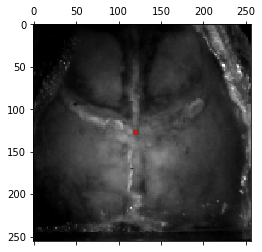

In [107]:
%matplotlib inline
l_bregma.show()

In [104]:
%matplotlib qt
r_bregma = seed.Bregma(r_mouse_blue)

Bregma Location: Column 121 Row 119

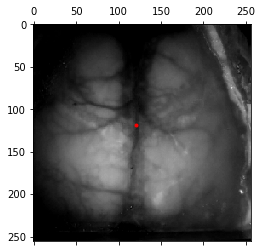

In [105]:
%matplotlib inline
r_bregma.show()

### Define parameters

In [108]:
start_interaction_frame = 2872
end_interaction_frame = 6930

# pixels per mm
l_ppmm = 30
r_ppmm = 30

### Produce adjusted (scaled) seed pixel objects

In [109]:
seeds = [("M1", 1.03 + 1, 1.365),("FL", .16, 2.47), ("HL", -.7, 1.85), 
         ("aBC", -1.36 + .575, 3.35),("pBC", -1.9, 3.35), ("AC", 0 + 1, 0.6), 
         ("RS", -2.8858 + 1, 0.62043),("V1", -4.2678 + .8, 2.5168), ("mPTA", -2.4962, 2.2932), 
         ("lPTA", -2.4962 - 0.3, 3.35 - 0.2),("Un", -1.5, 2.6)]

l_scaled_seeds = seed.generate_scaled_seeds(
    seeds=seeds,
    bregma=l_bregma,
    ppmm=l_ppmm,
    direction ='u'
)

r_scaled_seeds = seed.generate_scaled_seeds(
    seeds=seeds,
    bregma=r_bregma,
    ppmm=r_ppmm,
    direction ='u'
)

Direction chosen: u
Direction chosen: u


## Generate Correlation Matrix

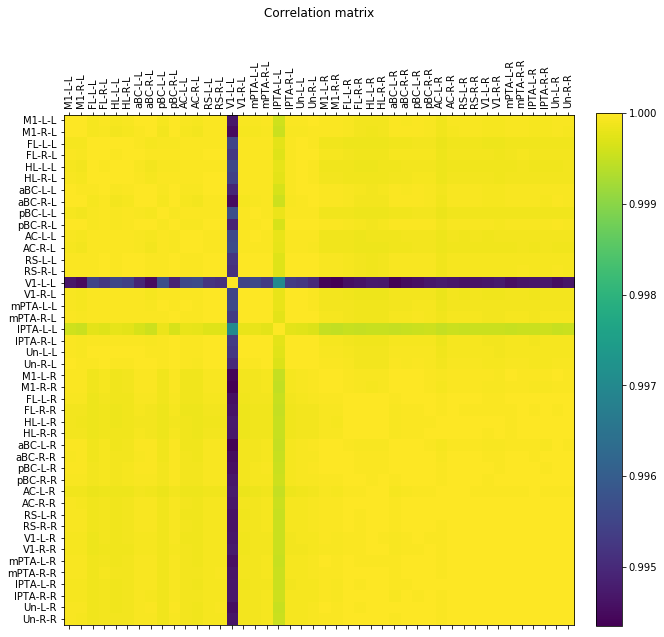

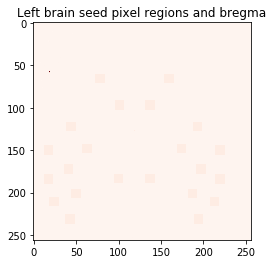

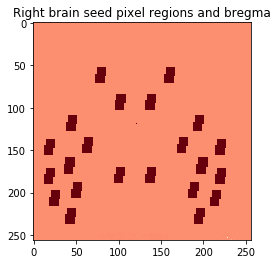

In [164]:
a = seed.generate_correlation_matrix(
    l_mouse_frames=l_mouse_frames[start_interaction_frame:end_interaction_frame], 
    r_mouse_frames=r_mouse_frames[start_interaction_frame:end_interaction_frame], # pass truncated frames
    l_seeds=l_scaled_seeds,
    r_seeds=r_scaled_seeds,
    title="Correlation matrix",
    filename="correlation_matrix",
    radius=5,
    interpolation="nearest",
    cmap="viridis",
    figsize=(10, 11)
)

## !Note: For the first right video frame from source has been edited out with blocks. As you can see above, there are two sets of squares for each seed pixel